<center>

# Football Analytics

Neste notebook iremos explorar dados gratuitos disponibilizados pelo StatsBomb.  

## IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS

In [59]:
# Importando Bibliotecas necessárias
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from urllib.request import urlopen
from mplsoccer import Sbopen, Pitch, FontManager, VerticalPitch, add_image
from PIL import Image
from statsbombpy import sb

In [38]:
# Ajustar as configurações de exibição do pandas
pd.set_option('display.max_columns', None)  # None permite mostrar todas as colunas

## EXTRAINDO AS COMPETIÇÕES E TEMPORADAS DISPONÍVEIS

In [39]:
competitions = sb.competitions()
competitions.head(3)

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825


In [40]:
# Criando uma lista com todas competições e seus respectivos ids, ordenadas de forma alfabética
competitions_list = competitions[['competition_name', 'competition_id']].drop_duplicates().reset_index(drop=True)

competitions_list

,competition_name,competition_id
0,1. Bundesliga,9
1,African Cup of Nations,1267
2,Champions League,16
3,Copa America,223
4,Copa del Rey,87
5,FA Women's Super League,37
6,FIFA U20 World Cup,1470
7,FIFA World Cup,43
8,Indian Super league,1238
9,La Liga,11


In [41]:
# Criando uma lista com todas as temporadas listadas da mais recente para a mais antiga
seasons_list = competitions[['season_name', 'season_id']].sort_values(by='season_name', ascending=False).drop_duplicates().reset_index(drop=True)

seasons_list

,season_name,season_id
0,2024,282
1,2023/2024,281
2,2023,107
3,2022/2023,235
4,2022,106
5,2021/2022,108
6,2020/2021,90
7,2020,43
8,2019/2020,42
9,2019,30


## SELECIONANDO COMPETIÇÃO E TEMPORADA

In [42]:
# Altere o id da competição e da temporada conforme desejar observando as listagens acima
campeonato = sb.matches(competition_id=43, season_id=106)
campeonato.head(3)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,available,2023-02-17T23:45:15.306706,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,available,2023-07-30T07:46:05.382784,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,available,2023-04-28T17:13:10.958725,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2


In [43]:
# checando a escrita exata de cada equipe
campeonato['home_team'].sort_values().unique()

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon',
       'Canada', 'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England',
       'France', 'Germany', 'Ghana', 'Iran', 'Japan', 'Mexico', 'Morocco',
       'Netherlands', 'Poland', 'Portugal', 'Qatar', 'Saudi Arabia',
       'Senegal', 'Serbia', 'South Korea', 'Spain', 'Switzerland',
       'Tunisia', 'United States', 'Uruguay', 'Wales'], dtype=object)

## SELECIONANDO EQUIPE 

In [44]:
# Filtrando partidas de uma seleção específica (Selecione a equipe que desejar)

equipe = 'Brazil'
df_partidas = campeonato.loc[(campeonato['home_team'] == f'{equipe}')|(campeonato['away_team'] == f'{equipe}')]
df_partidas.head(3)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
3,3857258,2022-11-24,21:00:00.000,International - FIFA World Cup,2022,Brazil,Serbia,2,0,available,available,2023-06-24T17:17:27.911026,2023-07-11T14:56:31.096588,1,Group Stage,Lusail Stadium,Alireza Faghani,Telê Santana da Silva,Dragan Stojković,1.1.0,2,2
14,3857269,2022-11-28,18:00:00.000,International - FIFA World Cup,2022,Brazil,Switzerland,1,0,available,available,2023-03-28T12:54:30.503171,2023-07-11T15:07:29.255525,2,Group Stage,Stadium 974,Ivan Arcides Barton Cisneros,Adenor Leonardo Bacchi,Murat Yakin,1.1.0,2,2
22,3869420,2022-12-09,17:00:00.000,International - FIFA World Cup,2022,Croatia,Brazil,1,1,available,available,2023-04-19T06:28:33.041249,2023-04-26T23:04:13.569501,5,Quarter-finals,Education City Stadium,Michael Oliver,Zlatko Dalić,Telê Santana da Silva,1.1.0,2,2


In [45]:
# Extarindo a lista de jogos da equipe selecionada
jogos_ids = df_partidas['match_id'].unique().tolist()
jogos_ids

[3857258, 3857269, 3869420, 3869253, 3857280]

In [46]:
# Inicializar o parser
parser = Sbopen()

# Listas para armazenar os dataframes
all_df = []
all_related = []
all_freeze = []
all_tactics = []

# Iterar sobre cada ID de jogo e coletar os dados
for jogo in jogos_ids:
    df, related, freeze, tactics = parser.event(jogo)
    
    # Adicionar os dataframes coletados às listas correspondentes
    all_df.append(df)
    all_related.append(related)
    all_freeze.append(freeze)
    all_tactics.append(tactics)

df_combined = pd.concat(all_df, ignore_index=True) # Informações de eventos detalhados
related_combined = pd.concat(all_related, ignore_index=True) # Informação de eventos relacionados (ex: Pass - Ball Receipt)
freeze_combined = pd.concat(all_freeze, ignore_index=True) # Informações de coordenada dos eventos
tactics_combined = pd.concat(all_tactics, ignore_index=True) # informações dos jogadores(nº camisa, posição, nome e ID)

In [47]:
# df contendo todos os jogos da equipe selecionada
df_combined.sample(3)

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,under_pressure,counterpress,outcome_id,outcome_name,out,pass_cross,pass_switch,off_camera,foul_committed_card_id,foul_committed_card_name,aerial_won,foul_committed_advantage,foul_won_advantage,foul_won_defensive,technique_id,technique_name,shot_one_on_one,shot_statsbomb_xg,end_z,goalkeeper_position_id,goalkeeper_position_name,injury_stoppage_in_chain,pass_assisted_shot_id,pass_shot_assist,shot_key_pass_id,dribble_nutmeg,ball_recovery_recovery_failure,dribble_overrun,ball_recovery_offensive,shot_first_time,block_offensive,substitution_replacement_id,substitution_replacement_name,bad_behaviour_card_id,bad_behaviour_card_name,pass_goal_assist,pass_cut_back,block_deflection,shot_deflected,dribble_no_touch,foul_committed_offensive,pass_miscommunication,pass_deflected,pass_no_touch,half_start_late_video_start,foul_committed_penalty,foul_won_penalty
17326,fa937aa9-bc5a-491d-bcc5-c7964c0c4391,692,1,00:16:15.048000,16,15,25,0.000000,3857280,6,Block,781,Brazil,1,Regular Play,2722,Cameroon,None,13454.0,Nouhou Tolo,6.0,Left Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,2.7,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7950,ca59d807-b840-4319-9f9b-fdc556a90572,508,1,00:11:10.571000,11,10,26,NaN,3869420,42,Ball Receipt,781,Brazil,1,Regular Play,781,Brazil,None,3295.0,Thiago Emiliano da Silva,5.0,Left Center Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.6,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12174,8850e915-ad6a-4951-8360-f310c7efbce8,4732,4,00:02:55.075000,107,55,234,1.214783,3869420,30,Pass,785,Croatia,1,Regular Play,785,Croatia,None,5469.0,Marcelo Brozović,10.0,Center Defensive Midfield,12625.0,Borna Sosa,24.989998,-1.274357,1.0,Ground Pass,76.4,9.7,40.0,Right Foot,NaN,NaN,69.1,33.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Extraindo os nomes das ações que podem ser analisadas
df_combined['type_name'].sort_values().unique()

array(['50/50', 'Bad Behaviour', 'Ball Receipt', 'Ball Recovery', 'Block',
       'Carry', 'Clearance', 'Dispossessed', 'Dribble', 'Dribbled Past',
       'Duel', 'Error', 'Foul Committed', 'Foul Won', 'Goal Keeper',
       'Half End', 'Half Start', 'Injury Stoppage', 'Interception',
       'Miscontrol', 'Offside', 'Pass', 'Player Off', 'Player On',
       'Pressure', 'Referee Ball-Drop', 'Shield', 'Shot', 'Starting XI',
       'Substitution', 'Tactical Shift'], dtype=object)

In [49]:
df_pass = df_combined[df_combined['type_name'] == 'Pass']

df_pass = df_pass[df_pass['team_name'] == equipe]

df_pass.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,under_pressure,counterpress,outcome_id,outcome_name,out,pass_cross,pass_switch,off_camera,foul_committed_card_id,foul_committed_card_name,aerial_won,foul_committed_advantage,foul_won_advantage,foul_won_defensive,technique_id,technique_name,shot_one_on_one,shot_statsbomb_xg,end_z,goalkeeper_position_id,goalkeeper_position_name,injury_stoppage_in_chain,pass_assisted_shot_id,pass_shot_assist,shot_key_pass_id,dribble_nutmeg,ball_recovery_recovery_failure,dribble_overrun,ball_recovery_offensive,shot_first_time,block_offensive,substitution_replacement_id,substitution_replacement_name,bad_behaviour_card_id,bad_behaviour_card_name,pass_goal_assist,pass_cut_back,block_deflection,shot_deflected,dribble_no_touch,foul_committed_offensive,pass_miscommunication,pass_deflected,pass_no_touch,half_start_late_video_start,foul_committed_penalty,foul_won_penalty
4,dd455069-07ce-4acb-a490-81118fcb0235,5,1,00:00:00.360000,0,0,2,0.757092,3857258,30,Pass,781,Brazil,9,From Kick Off,781,Brazil,None,3280.0,Richarlison de Andrade,23.0,Center Forward,4320.0,Neymar da Silva Santos Junior,3.313608,-1.661456,1.0,Ground Pass,59.7,36.7,40.0,Right Foot,65.0,Kick Off,60.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3ec348c7-e144-4c2a-8ad0-5c6e18199403,8,1,00:00:02.717000,0,2,2,1.945839,3857258,30,Pass,781,Brazil,9,From Kick Off,781,Brazil,None,4320.0,Neymar da Silva Santos Junior,19.0,Center Attacking Midfield,6945.0,Alex Sandro Lobo Silva,24.788708,-2.066923,1.0,Ground Pass,51.4,11.7,40.0,Right Foot,NaN,NaN,63.2,33.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,b3516a13-1244-4c4d-9d27-baf80949053b,11,1,00:00:06.342000,0,6,2,0.912137,3857258,30,Pass,781,Brazil,9,From Kick Off,781,Brazil,None,6945.0,Alex Sandro Lobo Silva,6.0,Left Back,5539.0,Carlos Henrique Casimiro,15.370751,1.909006,1.0,Ground Pass,51.6,24.3,38.0,Left Foot,NaN,NaN,56.7,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,ab9375d9-2e5b-40e6-8471-5ac9014edb02,14,1,00:00:09.553000,0,9,2,1.498808,3857258,30,Pass,781,Brazil,9,From Kick Off,781,Brazil,None,5539.0,Carlos Henrique Casimiro,11.0,Left Defensive Midfield,3295.0,Thiago Emiliano da Silva,9.616653,2.846152,1.0,Ground Pass,37.6,23.4,40.0,Right Foot,NaN,NaN,46.8,20.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,b83a8468-5a6a-4dd7-ae91-d4785fb3ec64,17,1,00:00:14.612000,0,14,2,1.530032,3857258,30,Pass,781,Brazil,9,From Kick Off,781,Brazil,None,3295.0,Thiago Emiliano da Silva,5.0,Left Center Back,6945.0,Alex Sandro Lobo Silva,20.900240,-1.566012,1.0,Ground Pass,38.7,7.2,40.0,Right Foot,NaN,NaN,38.6,28.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
def player_pass_in_match(jogo, jogador):
    df_filtered_jogo = df_pass[df_pass.match_id == jogo]
    df_filtered_jogador = df_filtered_jogo[df_filtered_jogo.player_name == jogador].reset_index(drop=True)
    
    start_x = df_filtered_jogador.x
    start_y = df_filtered_jogador.y
    end_x = df_filtered_jogador.end_x
    end_y = df_filtered_jogador.end_y
    shot_assist = df_filtered_jogador.pass_shot_assist
    goal_assist = df_filtered_jogador.pass_goal_assist
    cross = df_filtered_jogador.pass_cross
    outcome = df_filtered_jogador.outcome_name
    
    # Condições para "bons passes" (em direção ao gol dentro do intervalo)
    passe_ofensivo = (end_x > start_x + 7)
    passe_lateral = (end_x < start_x + 7) & (end_x > start_x - 7)
    passe_defensivo = (end_x < start_x - 7)
    
    # Definindo cor para tipos de passes
    cores = []
    linhas_tracadas = []  # Lista para armazenar se o passe é incompleto (usar linha tracejada)
    for i in range(len(start_x)):
        if cross[i] == True:
            cores.append('#FF0000')  # Vermelho para cruzamentos
        elif goal_assist[i] == True:
            cores.append('#0000FF')  # Azul para assistências de gol
        elif shot_assist[i] == True:
            cores.append('#000000')  # Preto para assistências de chute
        elif passe_ofensivo[i]:
            cores.append('#008000')  # Verde para passes ofensivos
        elif passe_lateral[i]:
            cores.append('#FFD700')  # Dourado para passes laterais
        elif passe_defensivo[i]:
            cores.append('#800080')  # Roxo para passes defensivos
        else:
            cores.append('#FFA500')  # Laranja para outros passes
        
        # Verifica se o passe foi incompleto e define transparência
        if pd.notna(outcome[i]):  # Se o outcome não for NaN, é um passe incompleto
            linhas_tracadas.append(True)
        else:
            linhas_tracadas.append(False)
    
    # Gerando o campo de jogo
    pitch = Pitch(pitch_color='#aabb97', line_color='white', stripe_color='#c2d59d', stripe=True)
    fig, ax = pitch.draw(figsize=(10, 6))
    
    # Plotando as marcações
    for i in range(len(start_x)):
        if linhas_tracadas[i]:
            # Passe incompleto: usar linha tracejada e transparência
            pitch.lines(start_x[i], start_y[i], end_x[i], end_y[i], ax=ax, color=cores[i], linestyle='--', alpha=0.5)
        else:
            # Passe completo: linha contínua
            pitch.lines(start_x[i], start_y[i], end_x[i], end_y[i], ax=ax, color=cores[i], comet=True)
    
    # Adicionando a legenda das cores dos passes
    legend_colors = [
        mpatches.Patch(color='#000000', label='Shot Assist'),
        mpatches.Patch(color='#0000FF', label='Goal Assist'),
        mpatches.Patch(color='#FF0000', label='Cross'),
        mpatches.Patch(color='#008000', label='Offensive Pass'),
        mpatches.Patch(color='#FFD700', label='Lateral Pass'),
        mpatches.Patch(color='#800080', label='Defensive Pass')]
    
    legend_pass_outcomes = [
        Line2D([0], [0], color='black', lw=2, linestyle='-', label='Complete'),
        Line2D([0], [0], color='black', lw=2, linestyle='--', label='Incomplete')]
    
    # Criando a primeira legenda para os tipos de passes (cores)
    legend1 = ax.legend(handles=legend_colors, loc='upper right', bbox_to_anchor=(1.21, 1), title="Pass Types", title_fontsize=14, fontsize=10)
    
    # Criando a segunda legenda para status de passes (completo/incompleto)
    legend2 = ax.legend(handles=legend_pass_outcomes, loc='upper right', bbox_to_anchor=(1.2, 0.55), title="Pass Outcome", title_fontsize=14, fontsize=10)
    
    # Adiciona a primeira legenda de volta ao eixo para evitar sobrescrever
    ax.add_artist(legend1)
    
    match =  df_partidas[df_partidas['match_id'] == jogo] 
    equipe_casa = match['home_team'].iloc[0]
    equipe_fora = match['away_team'].iloc[0]
    
    plt.title(f'Análise de Passes: {jogador} - {equipe_casa} Vs {equipe_fora} - {campeonato['competition'].loc[0]} {campeonato['season'].loc[0]}')
    
    plt.show()


In [52]:
# Extraindo a fração para facilitar a visualização do id do jogo para seleção
df_partidas[df_partidas['match_id'].isin(jogos_ids)][['match_id', 'home_team', 'away_team']]

,match_id,home_team,away_team
3,3857258,Brazil,Serbia
14,3857269,Brazil,Switzerland
22,3869420,Croatia,Brazil
25,3869253,Brazil,South Korea
48,3857280,Cameroon,Brazil


In [53]:
# Extraindo os nomes completos dos jogadores da equipe selecionada anteriormente
df_jogadores = df_combined[df_combined['team_name'] == equipe]
nomes_jogadores = df_jogadores['player_name'].sort_values().unique()

nomes_jogadores

array(['Alex Nicolao Telles', 'Alex Sandro Lobo Silva',
       'Alisson Ramsés Becker', 'Antony Matheus dos Santos',
       'Bruno Guimarães Rodriguez Moura', 'Carlos Henrique Casimiro',
       'Daniel Alves da Silva', 'Danilo Luiz da Silva',
       'Ederson Santana de Moraes', 'Frederico Rodrigues Santos',
       'Fábio Henrique Tavares', 'Gabriel Fernando de Jesus',
       'Gabriel Teodoro Martinelli Silva',
       'Gleison Bremer Silva Nascimento',
       'Lucas Tolentino Coelho de Lima', 'Marcos Aoás Corrêa',
       'Neymar da Silva Santos Junior',
       'Pedro Guilherme Abreu dos Santos', 'Raphael Dias Belloli',
       'Richarlison de Andrade', 'Rodrygo Silva de Goes',
       'Thiago Emiliano da Silva',
       'Vinícius José Paixão de Oliveira Júnior',
       'Weverton Pereira da Silva', 'Éder Gabriel Militão',
       'Éverton Augusto de Barros Ribeiro', nan], dtype=object)

## Analisando

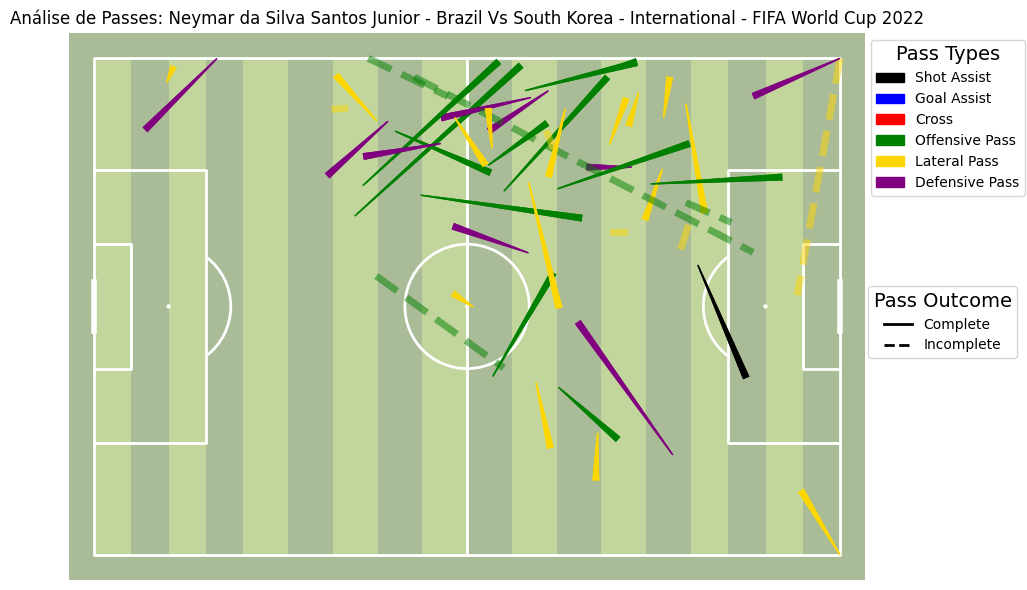

In [101]:
# Selecionando o jogo e o jogador que desejamos analisar os passes
player_pass_in_match(3869253, 'Neymar da Silva Santos Junior')